#Dsc Machine Learning Task

## Importing Libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import tensorflow as tf
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

In [3]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [4]:
from sklearn import preprocessing

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

## Loading dataset

In [6]:
#store data into a dataframe from csv
dataframe = pd.read_csv('DSC_Task.csv')
dataframe.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.463330,34.160000,53.996091,0,0.000000,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,0.076923,0.153846,0.429468,15.285714,96.231625,0,0.008475,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.341657,22.000000,83.051415,0,0.000000,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.005735,3.000000,523.080000,0,0.000000,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.456549,12.333333,53.766640,0,0.000000,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


## Exploratory Data Analysis

In [7]:
#shape and size of the dataframe
dataframe.shape

(488877, 27)

In [8]:
#data type of the features
dataframe.dtypes

Unnamed: 0                           int64
userId                               int64
tier                                 int64
gender                               int64
following_rate                     float64
followers_avg_age                  float64
following_avg_age                  float64
max_repetitive_punc                  int64
num_of_hashtags_per_action         float64
emoji_count_per_action             float64
punctuations_per_action            float64
number_of_words_per_action         float64
avgCompletion                      float64
avgTimeSpent                       float64
avgDuration                        float64
avgComments                          int64
creations                          float64
content_views                      float64
num_of_comments                    float64
weekends_trails_watched_per_day    float64
weekdays_trails_watched_per_day    float64
slot1_trails_watched_per_day       float64
slot2_trails_watched_per_day       float64
slot3_trail

In [9]:
#statistical inference
dataframe.describe()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
count,488877.000000,4.888770e+05,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,4.888770e+05,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,271605.981815,4.236096e+07,1.975382,1.213037,0.082233,0.347520,0.403049,0.739748,0.000277,0.000981,0.012805,0.179148,0.341582,1.087395e+02,83.104654,0.320923,0.017065,0.391013,0.002009,0.074353,0.066927,0.032855,0.141705,0.150401,0.158382,164.765782,1.741643
std,156808.138002,1.821664e+07,0.430707,0.409454,2.467781,0.816334,0.925291,3.075954,0.012221,0.020381,0.159553,0.647588,0.195441,5.537516e+04,76.779586,7.649827,0.180402,0.905303,0.030561,0.211094,0.174791,0.193962,0.402612,0.451999,0.502065,981.988886,1.088559
min,0.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000653,1.000000e+00,0.233000,0.000000,0.000000,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,135779.000000,3.537599e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199675,5.655172e+00,30.724000,0.000000,0.000000,0.040650,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,271560.000000,4.336270e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329743,8.500000e+00,62.501164,0.000000,0.000000,0.124031,0.000000,0.003968,0.015873,0.000000,0.011834,0.014563,0.015873,0.000000,1.000000
75%,407431.000000,5.370523e+07,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150183,0.460492,1.308654e+01,112.246500,0.000000,0.009091,0.364486,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.122396,178.666667,2.000000
max,543196.000000,7.904203e+07,3.000000,2.000000,895.304000,4.000000,4.000000,624.000000,2.333333,3.000000,27.333333,262.666667,1.000000,3.826604e+07,7541.026000,3228.000000,63.388889,75.662281,8.196850,17.201754,18.756140,19.612903,27.905983,45.083333,55.153846,39304.000000,4.000000


In [18]:
#null values in the dataset
dataframe.isnull().sum()

following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
age_group                          0
dtype: int64

In [12]:
#name of the features
dataframe.columns

Index(['Unnamed: 0', 'userId', 'tier', 'gender', 'following_rate',
       'followers_avg_age', 'following_avg_age', 'max_repetitive_punc',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments',
       'creations', 'content_views', 'num_of_comments',
       'weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day', 'avgt2',
       'age_group'],
      dtype='object')

In [13]:
#removing redundant features
dataframe = dataframe.drop(['Unnamed: 0', 'userId', 'tier', 'gender'], axis=1)
dataframe.head()

,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.463330,34.160000,53.996091,0,0.000000,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,0.0,0.0,0.0,0,0.0,0.0,0.076923,0.153846,0.429468,15.285714,96.231625,0,0.008475,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.341657,22.000000,83.051415,0,0.000000,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.005735,3.000000,523.080000,0,0.000000,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.456549,12.333333,53.766640,0,0.000000,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [14]:
#updated shape
dataframe.shape

(488877, 23)

In [15]:
#finding duplicate data
duplicate_rows_df = dataframe[dataframe.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (4697, 23)


In [16]:
dataframe.count() 

following_rate                     488877
followers_avg_age                  488877
following_avg_age                  488877
max_repetitive_punc                488877
num_of_hashtags_per_action         488877
emoji_count_per_action             488877
punctuations_per_action            488877
number_of_words_per_action         488877
avgCompletion                      488877
avgTimeSpent                       488877
avgDuration                        488877
avgComments                        488877
creations                          488877
content_views                      488877
num_of_comments                    488877
weekends_trails_watched_per_day    488877
weekdays_trails_watched_per_day    488877
slot1_trails_watched_per_day       488877
slot2_trails_watched_per_day       488877
slot3_trails_watched_per_day       488877
slot4_trails_watched_per_day       488877
avgt2                              488877
age_group                          488877
dtype: int64

In [17]:
#removing duplicate data
dataframe = dataframe.drop_duplicates()
dataframe.head(5)

,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.463330,34.160000,53.996091,0,0.000000,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,0.0,0.0,0.0,0,0.0,0.0,0.076923,0.153846,0.429468,15.285714,96.231625,0,0.008475,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.341657,22.000000,83.051415,0,0.000000,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.005735,3.000000,523.080000,0,0.000000,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.456549,12.333333,53.766640,0,0.000000,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
following_rate,1.000000,0.064627,0.060661,0.041980,-0.000274,-0.000110,0.000411,0.013450,-0.002220,-0.000042,0.002608,0.048708,0.068396,0.068030,0.097303,0.069358,0.078690,0.037360,0.067056,0.066203,0.067468,0.000332,0.023026
followers_avg_age,0.064627,1.000000,0.939531,0.171550,0.007064,0.002770,0.012022,0.122155,-0.006192,0.003223,0.070717,0.066604,0.096358,0.130748,0.091183,0.141807,0.148516,0.089925,0.123518,0.126916,0.129670,0.105310,0.283221
following_avg_age,0.060661,0.939531,1.000000,0.164260,0.007321,0.002994,0.012344,0.123634,-0.010080,0.003128,0.076087,0.063899,0.089151,0.115404,0.086155,0.128692,0.132141,0.081706,0.110698,0.112844,0.116268,0.108262,0.283606
max_repetitive_punc,0.041980,0.171550,0.164260,1.000000,0.013153,0.036527,0.107390,0.113329,0.015527,0.001446,0.012854,0.085125,0.128086,0.103561,0.134346,0.124273,0.131502,0.076426,0.108733,0.116887,0.111418,0.014853,0.149345
num_of_hashtags_per_action,-0.000274,0.007064,0.007321,0.013153,1.000000,0.082207,0.246667,0.063880,-0.000721,-0.000028,0.006733,0.000042,0.000199,-0.007352,-0.000680,-0.005134,-0.006094,-0.002153,-0.005721,-0.005167,-0.004853,0.005892,0.004380
emoji_count_per_action,-0.000110,0.002770,0.002994,0.036527,0.082207,1.000000,0.268522,0.091354,0.006488,-0.000079,0.000638,-0.000750,-0.000175,-0.015141,-0.001215,-0.010463,-0.012807,-0.004774,-0.011806,-0.010383,-0.010428,0.000295,0.003045
punctuations_per_action,0.000411,0.012022,0.012344,0.107390,0.246667,0.268522,1.000000,0.178515,0.005640,-0.000131,0.011597,-0.000408,0.000381,-0.025386,-0.001485,-0.017807,-0.021284,-0.007671,-0.019781,-0.017714,-0.017244,0.006412,0.018068
number_of_words_per_action,0.013450,0.122155,0.123634,0.113329,0.063880,0.091354,0.178515,1.000000,-0.007281,0.000408,0.094934,0.084354,0.090588,-0.052488,0.105745,-0.024688,-0.029912,-0.000812,-0.033663,-0.023853,-0.024039,0.112296,0.155514
avgCompletion,-0.002220,-0.006192,-0.010080,0.015527,-0.000721,0.006488,0.005640,-0.007281,1.000000,-0.001659,-0.508405,-0.002175,-0.007385,0.118825,0.004823,0.112352,0.097855,0.029324,0.100000,0.096615,0.086290,-0.004360,0.054431
avgTimeSpent,-0.000042,0.003223,0.003128,0.001446,-0.000028,-0.000079,-0.000131,0.000408,-0.001659,1.000000,0.001692,0.000127,-0.000060,-0.000357,-0.000046,-0.000230,-0.000301,-0.000275,-0.000178,-0.000067,-0.000407,0.002326,0.001515


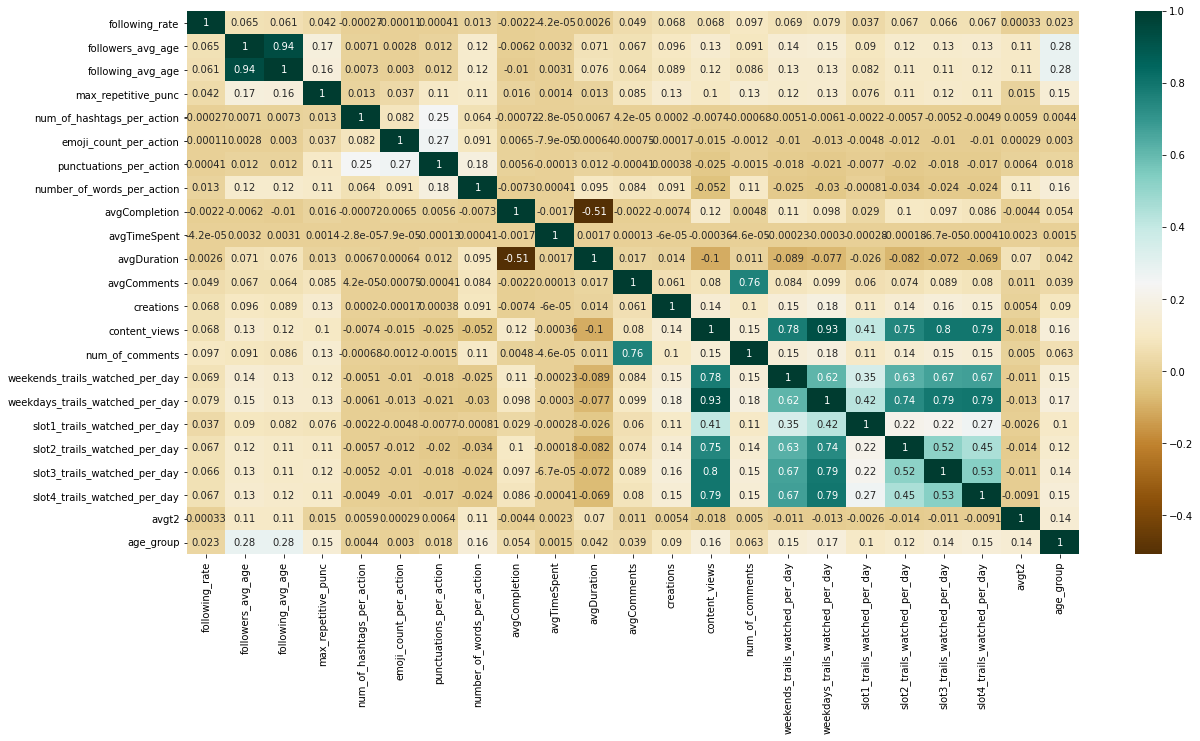

In [19]:
#plotting heatmap to estimate correlation
plt.figure(figsize=(20,10))
c= dataframe.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [20]:
#finding target classes
pd.unique(dataframe['age_group'])

array([1, 2, 3, 4])

In [21]:
#excluding target column before normalization
data = dataframe.drop(['age_group'], axis=1)

### Normalization

In [22]:
preprocessed_data = preprocessing.normalize(data)
normalized_dataframe = pd.DataFrame(preprocessed_data)
normalized_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.007251,0.534614,0.845055,0.0,0.000000,0.003130,0.0,0.000652,0.000391,0.0,0.000000,0.002739,0.000522,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000602,0.001205,0.003364,0.119725,0.753729,0.0,0.000066,0.000730,0.0,0.000100,0.000146,0.0,0.000664,0.000000,0.000266,0.646177
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.003977,0.256062,0.966652,0.0,0.000000,0.000032,0.0,0.000000,0.000006,0.0,0.000032,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000011,0.005735,0.999984,0.0,0.000000,0.000016,0.0,0.000000,0.000003,0.0,0.000000,0.000000,0.000016,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.008276,0.223569,0.974639,0.0,0.000000,0.003715,0.0,0.000000,0.000892,0.0,0.000149,0.001040,0.003269,0.000000


## Feature Engineering

In [23]:
dataset = dataframe.values

In [24]:
norm_dataset = normalized_dataframe.values
X = norm_dataset[:,0:-1].astype(float)

In [25]:
Y = dataset[:,-1]

### Train-Validation-Test Split

In [26]:
from sklearn.model_selection import train_test_split

#splitting data into train: test in 80:20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(387344, 21)
(96836, 21)
(387344,)
(96836,)


### One Hot Encoding

In [27]:
#one hot encoding the training labels
encoder = LabelEncoder()
encoder.fit(Y_train)
encoded_Y = encoder.transform(Y_train)
# convert integers to dummy variables (i.e. one hot encoded)
Y_train = np_utils.to_categorical(encoded_Y)

## Building Model

In [28]:
def get_model():
  #define model
  model = Sequential()
  model.add(Dense(8, input_dim=21, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(4, activation='softmax'))
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 176       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       
Total params: 596
Trainable params: 596
Non-trainable params: 0
_________________________________________________________________


### /

In [ ]:
#estimator = KerasClassifier(build_fn=get_model, epochs=200, batch_size=5, verbose=0)

In [ ]:
#kfold = KFold(n_splits=10, shuffle=True)

In [22]:
#results = cross_val_score(estimator, X, dummy_y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


## Training Model

In [29]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 5)

model = get_model()

#Prediction on untrained model for comparision.
preds_on_untrained = model.predict(X_test, verbose=0)

#Fitting the model for given data
history = model.fit(
    X_train, Y_train,
    validation_split = 0.125, #7:1 ratio for train-val split
    epochs = 100,  
    callbacks = [early_stopping]
)


Epoch 1/100
10592/10592 [==============================] - 12s 1ms/step - loss: 0.8216 - accuracy: 0.6296 - val_loss: 0.7498 - val_accuracy: 0.6349
Epoch 2/100
10592/10592 [==============================] - 11s 1ms/step - loss: 0.7430 - accuracy: 0.6375 - val_loss: 0.7293 - val_accuracy: 0.6474
Epoch 3/100
10592/10592 [==============================] - 11s 1ms/step - loss: 0.7264 - accuracy: 0.6504 - val_loss: 0.7195 - val_accuracy: 0.6523
Epoch 4/100
10592/10592 [==============================] - 11s 1ms/step - loss: 0.7145 - accuracy: 0.6582 - val_loss: 0.7123 - val_accuracy: 0.6541
Epoch 5/100
10592/10592 [==============================] - 11s 1ms/step - loss: 0.7094 - accuracy: 0.6593 - val_loss: 0.7121 - val_accuracy: 0.6607
Epoch 6/100
10592/10592 [==============================] - 11s 1ms/step - loss: 0.7067 - accuracy: 0.6616 - val_loss: 0.7115 - val_accuracy: 0.6587
Epoch 7/100
10592/10592 [==============================] - 11s 1ms/step - loss: 0.7049 - accuracy: 0.6615 - val_

## Model Evaluation

In [30]:
#predicted probabilites
yhat_probs = model.predict(X_test, verbose=0)

In [31]:
#yhat_classes = model.predict_classes(X_test, verbose=0)

In [32]:
#predicted classes
yhat = np.argmax(model.predict(X_test), axis=-1)

In [33]:
Y_test

array([1., 4., 1., ..., 1., 2., 1.])

In [34]:
for i in range(len(yhat)):
  yhat[i] += 1 #since yhat is in range 0-3

In [35]:
np.unique(yhat)

array([1, 2, 3, 4])

### Training and Val loss - Graph

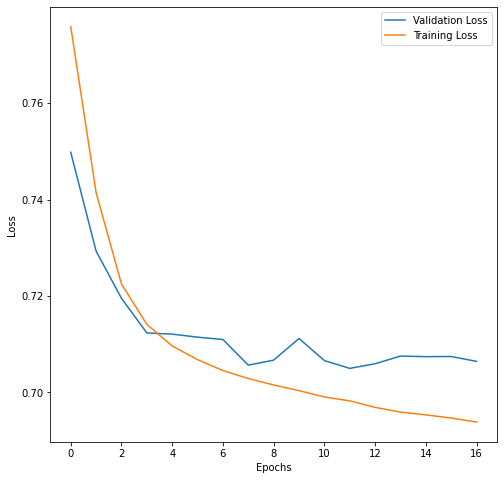

In [36]:
def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return
plot_loss(history)

## Metrics

In [37]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, yhat)
print('Accuracy: %f' % accuracy)

Accuracy: 0.668481


In [38]:
# precision tp / (tp + fp)
precision = precision_score(Y_test, yhat,average='micro')
print('Precision: %f' % precision)

Precision: 0.668481


In [39]:
# recall: tp / (tp + fn)
recall = recall_score(Y_test, yhat,average='micro')
print('Recall: %f' % recall)

Recall: 0.668481


In [40]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, yhat,average='micro')
print('F1 score: %f' % f1)

F1 score: 0.668481


In [41]:
auc = roc_auc_score(Y_test, yhat_probs,average='macro',multi_class='ovr')
print('ROC AUC: %f' % auc)


ROC AUC: 0.851364


In [42]:
# confusion matrix
matrix = confusion_matrix(Y_test, yhat)
print(matrix)

[[53851  3181   110  3803]
 [ 4541  3997   231  3057]
 [ 4225  2511   296  5102]
 [ 3345  1775   222  6589]]


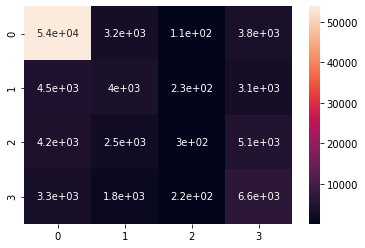

In [43]:
#Confusion matrix visualization
import seaborn as sns
sns.heatmap(matrix, annot=True)

### ROC Curve